IMPORTING NECESSARY LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


LOAD AND CLEAN DATA

In [5]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')  # Adjust path if needed

# Check for missing values
print(df.isnull().sum())

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [19]:
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id", "dataset"], inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Binary target
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)

# Impute missing values
X = df.drop(columns=["target"])
y = df["target"]
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

In [20]:
print(df.columns)
print(df.head())


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3      0   
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5      1   
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6      1   
3   37    1   2     130.0  250.0    0        2   187.0      0      3.5      0   
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4      3   

    ca  thal  target  
0  0.0     0       0  
1  3.0     2       1  
2  2.0     3       1  
3  0.0     2       0  
4  0.0     2       0  


EDA (Exploratory Data Analysis)

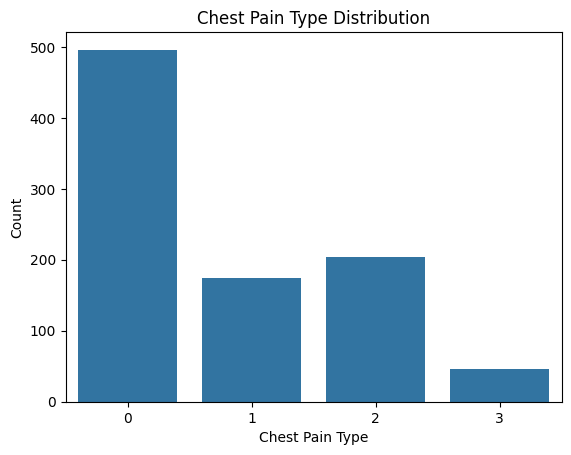

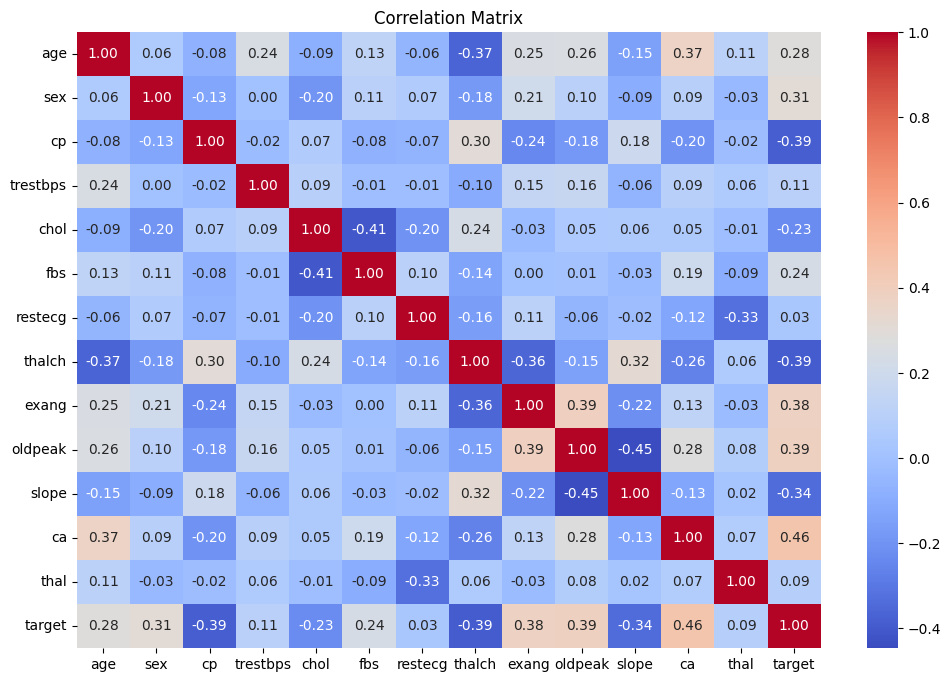

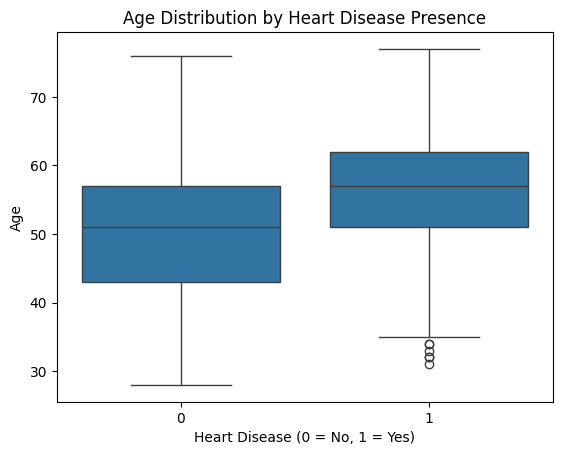

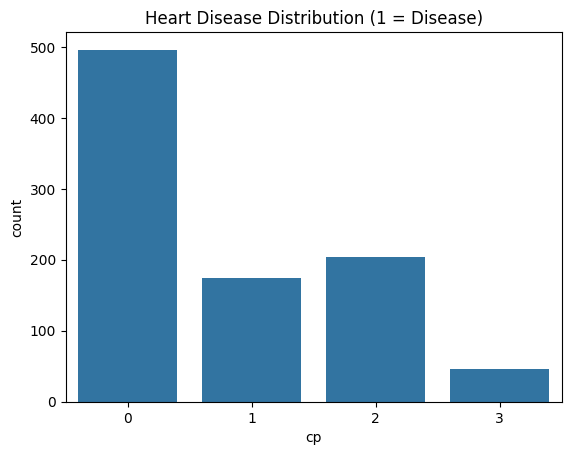

In [21]:

# 1. Count plot for 'cp' (chest pain type)
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# 2. Heatmap of correlations
plt.figure(figsize=(12, 8))  # optional, for better visibility
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Boxplot: Age vs Heart Disease Target
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



sns.countplot(x='cp', data=df)
plt.title('Heart Disease Distribution (1 = Disease)')
plt.show()


EDA (For correlation heatmap)

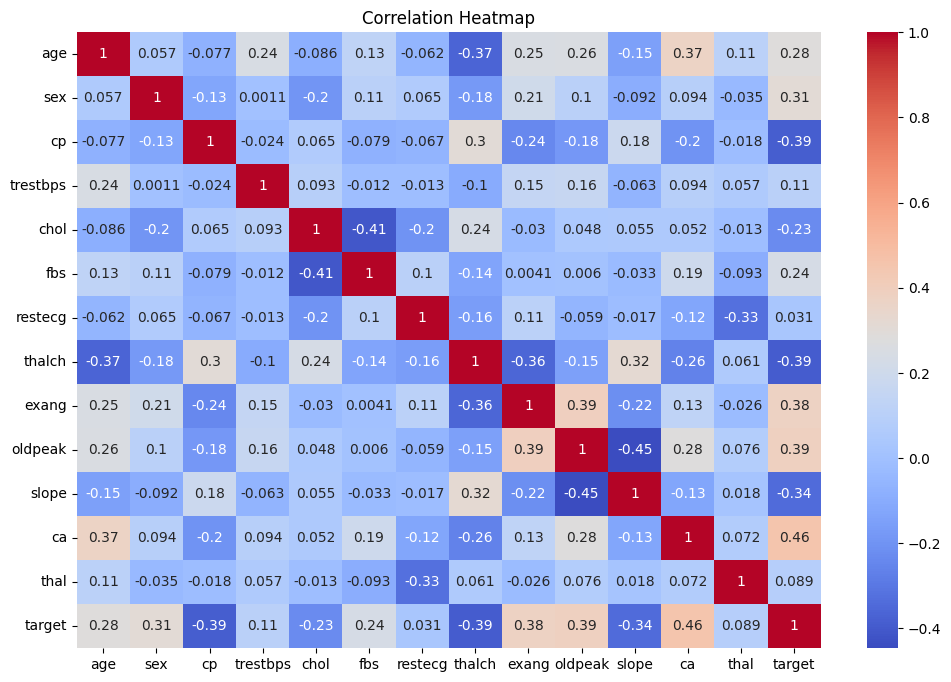

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


TRAIN MODELS

In [13]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

EVALUATE MODELS

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def evaluate(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print(f"{name} ROC-AUC: {roc_auc:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}")

evaluate(log_model, "Logistic Regression")
evaluate(tree_model, "Decision Tree")


Logistic Regression Accuracy: 0.81
Logistic Regression ROC-AUC: 0.88
Logistic Regression Confusion Matrix:
[[64 11]
 [24 85]]
Decision Tree Accuracy: 0.75
Decision Tree ROC-AUC: 0.76
Decision Tree Confusion Matrix:
[[59 16]
 [30 79]]


FEATURE IMPORTANCE

In [15]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
print("Top Features (Logistic Regression):")
print(importance.abs().sort_values(ascending=False).head(10))


Top Features (Logistic Regression):
sex        1.511377
ca         1.088266
cp         0.703125
oldpeak    0.615041
fbs        0.593760
exang      0.527667
slope      0.389956
thal       0.342961
thalch     0.013997
restecg    0.010835
dtype: float64
